In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import aux_functions as f

In [39]:
df = pd.read_csv("data/df_clean_all.csv", index_col = None)

In [40]:
df = df.reset_index(drop=True)

In [41]:
df.columns

Index(['Unnamed: 0', 'client_id', 'clnt_tenure_yr', 'clnt_tenure_mnth',
       'clnt_age', 'gendr', 'num_accts', 'bal', 'calls_6_mnth',
       'logons_6_mnth', 'generation', 'testing_engagement', 'balance_level',
       'tenure', 'Variation', 'visitor_id', 'visit_id', 'process_step',
       'date_time'],
      dtype='object')

In [42]:
df = df.drop(columns='Unnamed: 0')

In [43]:
df

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,generation,testing_engagement,balance_level,tenure,Variation,visitor_id,visit_id,process_step,date_time
0,836976,6.0,73.0,60.5,U,2,45105.30,6.0,9.0,boomers,low,0-100k,5-10,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:51:13
1,836976,6.0,73.0,60.5,U,2,45105.30,6.0,9.0,boomers,low,0-100k,5-10,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:47:50
2,836976,6.0,73.0,60.5,U,2,45105.30,6.0,9.0,boomers,low,0-100k,5-10,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:46:45
3,836976,6.0,73.0,60.5,U,2,45105.30,6.0,9.0,boomers,low,0-100k,5-10,Test,427070339_1413275162,228976764_46825473280_96584,step_3,2017-04-02 11:23:08
4,836976,6.0,73.0,60.5,U,2,45105.30,6.0,9.0,boomers,low,0-100k,5-10,Test,427070339_1413275162,228976764_46825473280_96584,step_2,2017-04-02 11:22:24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317118,7468138,18.0,222.0,61.0,F,3,209278.15,0.0,3.0,boomers,low,100-500k,15-20,Test,317123960_46820919455,769876461_30381166055_830233,step_2,2017-03-30 23:59:15
317119,7468138,18.0,222.0,61.0,F,3,209278.15,0.0,3.0,boomers,low,100-500k,15-20,Test,317123960_46820919455,769876461_30381166055_830233,step_1,2017-03-30 23:58:51
317120,7468138,18.0,222.0,61.0,F,3,209278.15,0.0,3.0,boomers,low,100-500k,15-20,Test,317123960_46820919455,769876461_30381166055_830233,start,2017-03-30 23:58:40
317121,7468138,18.0,222.0,61.0,F,3,209278.15,0.0,3.0,boomers,low,100-500k,15-20,Test,317123960_46820919455,769876461_30381166055_830233,start,2017-03-30 23:55:11


## 1. Who are the primary clients using this online process?

In [44]:
df_control = df[df['Variation']== 'Control']
df_test = df[df['Variation']== 'Test']

In [45]:
df_control

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,generation,testing_engagement,balance_level,tenure,Variation,visitor_id,visit_id,process_step,date_time
11,2304905,7.0,94.0,58.0,U,2,110860.30,6.0,9.0,boomers,low,100-500k,5-10,Control,336210275_56978226960,724930510_65323235593_692754,confirm,2017-05-21 11:07:16
12,2304905,7.0,94.0,58.0,U,2,110860.30,6.0,9.0,boomers,low,100-500k,5-10,Control,336210275_56978226960,724930510_65323235593_692754,step_3,2017-05-21 11:04:53
13,2304905,7.0,94.0,58.0,U,2,110860.30,6.0,9.0,boomers,low,100-500k,5-10,Control,336210275_56978226960,724930510_65323235593_692754,step_2,2017-05-21 11:04:04
14,2304905,7.0,94.0,58.0,U,2,110860.30,6.0,9.0,boomers,low,100-500k,5-10,Control,336210275_56978226960,724930510_65323235593_692754,step_1,2017-05-21 11:03:31
15,2304905,7.0,94.0,58.0,U,2,110860.30,6.0,9.0,boomers,low,100-500k,5-10,Control,336210275_56978226960,724930510_65323235593_692754,start,2017-05-21 11:03:25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317097,6967120,21.0,260.0,68.5,M,3,4279873.38,6.0,9.0,boomers,low,+1M,20-50,Control,663474827_38847225720,923772865_74694577233_449836,confirm,2017-04-12 19:06:55
317098,6967120,21.0,260.0,68.5,M,3,4279873.38,6.0,9.0,boomers,low,+1M,20-50,Control,663474827_38847225720,923772865_74694577233_449836,step_3,2017-04-12 19:05:14
317099,6967120,21.0,260.0,68.5,M,3,4279873.38,6.0,9.0,boomers,low,+1M,20-50,Control,663474827_38847225720,923772865_74694577233_449836,step_2,2017-04-12 19:04:29
317100,6967120,21.0,260.0,68.5,M,3,4279873.38,6.0,9.0,boomers,low,+1M,20-50,Control,663474827_38847225720,923772865_74694577233_449836,step_1,2017-04-12 19:04:07


In [46]:
frequency_table_control, proportion_table_control, frequency_table_test, proportion_table_test = f.create_frequency_table(df_control, df_test, 'gendr')

C:\Users\celia\AppData\Local\Temp\ipykernel_11188\270614438.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequency_table_control.index, y=frequency_table_control.values, palette="Set3");
C:\Users\celia\AppData\Local\Temp\ipykernel_11188\270614438.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequency_table_test.index, y=frequency_table_test.values, palette="Set3");


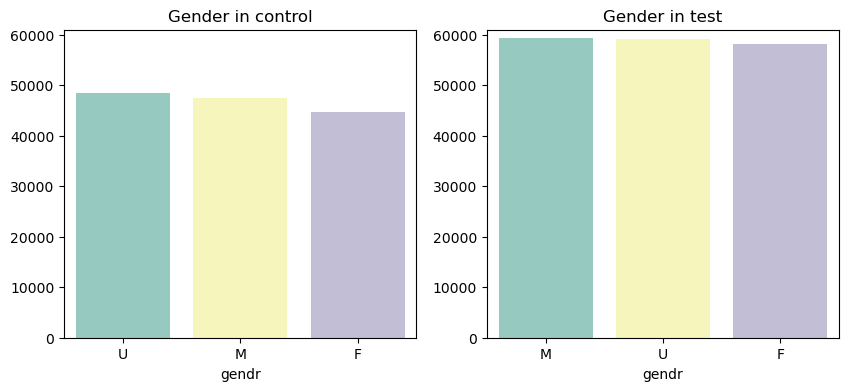

In [47]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.barplot(x=frequency_table_control.index, y=frequency_table_control.values, palette="Set3");
plt.ylim([0,61000])
plt.title('Gender in control')
plt.subplot(1,2,2)
sns.barplot(x=frequency_table_test.index, y=frequency_table_test.values, palette="Set3");
plt.ylim([0,61000])
plt.title('Gender in test')
plt.show()

In [48]:
# Frequency table for 'generation'
frequency_table_generation_test = df_test['generation'].value_counts()
# Calculating the proportion of each unique value in the 'Generation'
proportion_table_generation_test = df_test['generation'].value_counts(normalize=True)
frequency_table_generation_test, proportion_table_generation_test

(generation
 boomers         76496
 millennials     30371
 X generation    28651
 Z generation    27390
 70+             13733
 Name: count, dtype: int64,
 generation
 boomers         0.433059
 millennials     0.171936
 X generation    0.162199
 Z generation    0.155060
 70+             0.077745
 Name: proportion, dtype: float64)

In [49]:
# Frequency table for 'generation'
frequency_table_generation_control = df_control['generation'].value_counts()
# Calculating the proportion of each unique value in the 'Generation'
proportion_table_generation_control = df_control['generation'].value_counts(normalize=True)
frequency_table_generation_control, proportion_table_generation_control

(generation
 boomers         59322
 millennials     24793
 X generation    23406
 Z generation    22426
 70+             10535
 Name: count, dtype: int64,
 generation
 boomers         0.422275
 millennials     0.176485
 X generation    0.166612
 Z generation    0.159636
 70+             0.074992
 Name: proportion, dtype: float64)

In [50]:
frequency_table_generation_control, proportion_table_generation_control, frequency_table_generation_test, proportion_table_generation_test = f.create_frequency_table(df_control, df_test, 'generation')

C:\Users\celia\AppData\Local\Temp\ipykernel_11188\3191112310.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequency_table_generation_control.index, y=frequency_table_generation_control.values, palette="Set3");
C:\Users\celia\AppData\Local\Temp\ipykernel_11188\3191112310.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequency_table_generation_test.index, y=frequency_table_generation_test.values, palette="Set3");


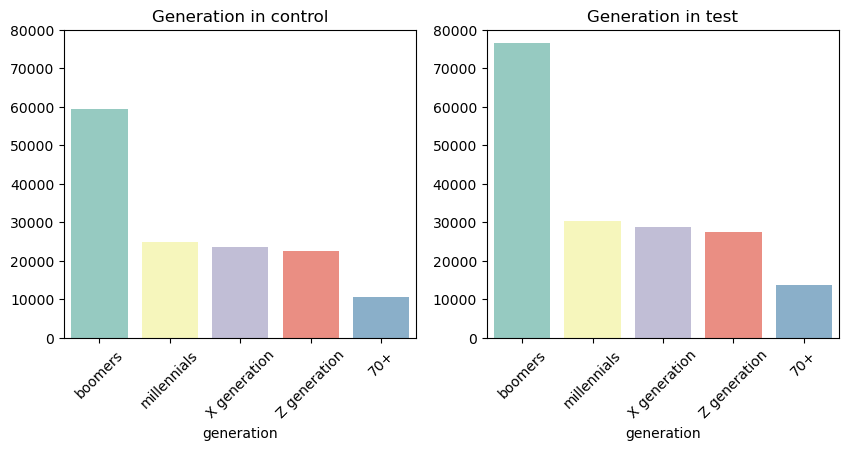

In [51]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.barplot(x=frequency_table_generation_control.index, y=frequency_table_generation_control.values, palette="Set3");
plt.ylim([0,80000])
plt.xticks(rotation=45)
plt.title('Generation in control')
plt.subplot(1,2,2)
sns.barplot(x=frequency_table_generation_test.index, y=frequency_table_generation_test.values, palette="Set3");
plt.ylim([0,80000])
plt.xticks(rotation=45)
plt.title('Generation in test')
plt.show()

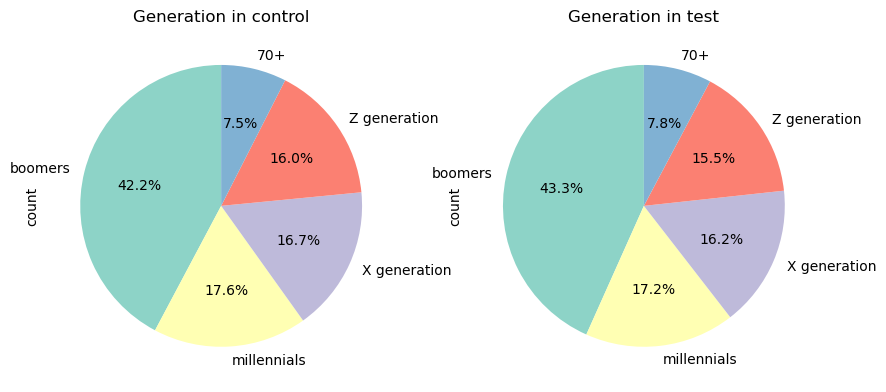

In [52]:
plt.figure(figsize=(10,9))
plt.subplot(1,2,1)
frequency_table_generation_control.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"))
plt.title('Generation in control')
plt.subplot(1,2,2)
frequency_table_generation_test.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"))
plt.title('Generation in test')
plt.show()

In [53]:
df_control.shape[0], df_test.shape[0]

(140482, 176641)

### 2. Are the primary clients younger or older, new or long-standing?

In [54]:
frequency_table_tenure_control, proportion_table_tenure_control, frequency_table_tenure_test, proportion_table_tenure_test = f.create_frequency_table(df_control, df_test, 'tenure')

In [55]:
frequency_table_tenure_control

tenure
5-10     52172
10-15    32295
20-50    23684
15-20    21863
0-5      10421
+50         47
Name: count, dtype: int64

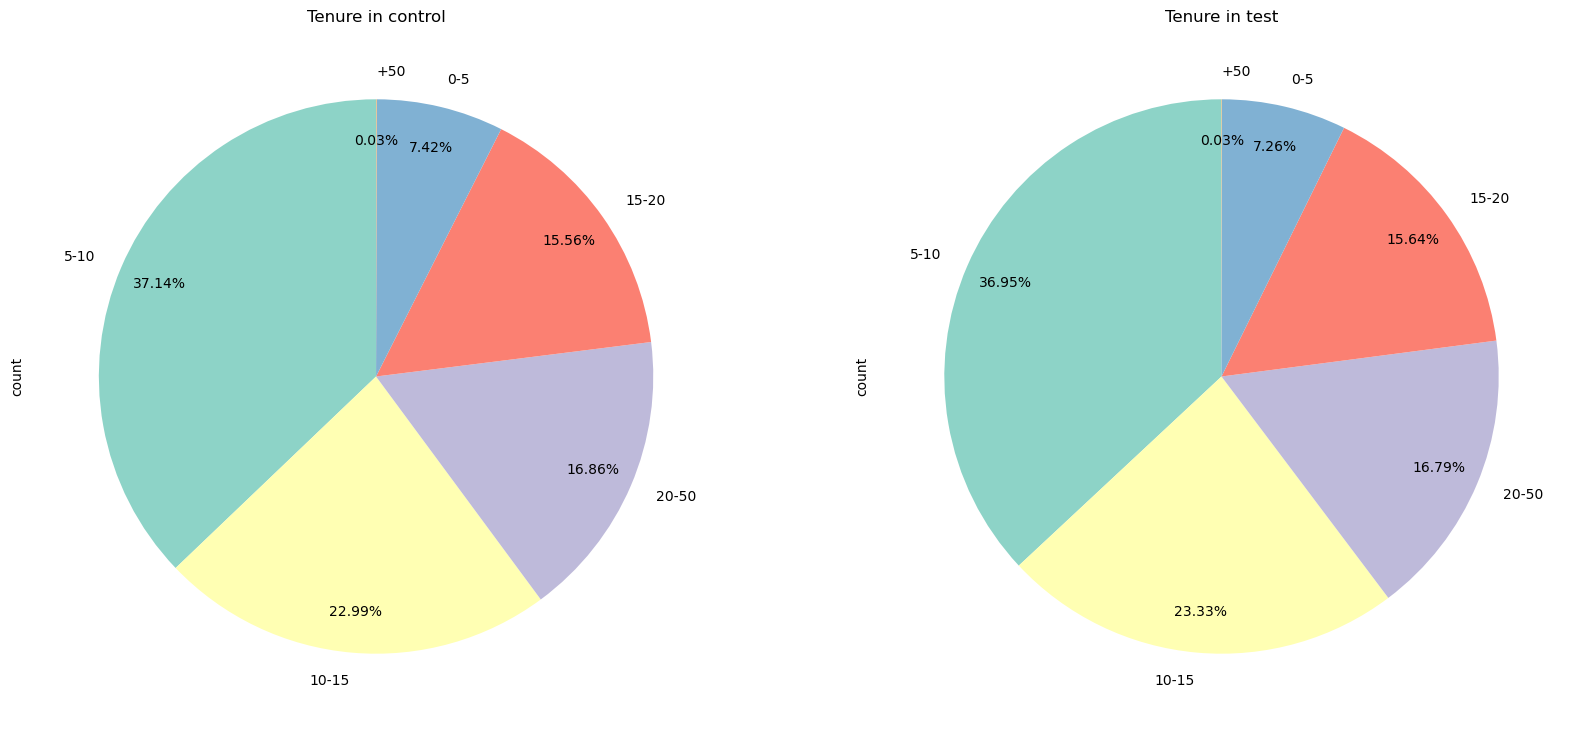

In [56]:
plt.figure(figsize=(20,9))
plt.subplot(1,2,1)
frequency_table_tenure_control.plot.pie(autopct='%1.2f%%', startangle=90, colors=sns.color_palette("Set3"), pctdistance=0.85, labeldistance=1.1  )

plt.title('Tenure in control')
plt.subplot(1,2,2)
frequency_table_tenure_test.plot.pie(autopct='%1.2f%%', startangle=90, colors=sns.color_palette("Set3"), pctdistance=0.85, labeldistance=1.1 )
plt.title('Tenure in test')
plt.show()

In [57]:
df_control.columns

Index(['client_id', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth', 'generation',
       'testing_engagement', 'balance_level', 'tenure', 'Variation',
       'visitor_id', 'visit_id', 'process_step', 'date_time'],
      dtype='object')

In [58]:
frequency_table_balance_level_control, proportion_table_balance_level_control, frequency_table_balance_level_test, proportion_table_balance_level_test = f.create_frequency_table(df_control, df_test, 'balance_level')

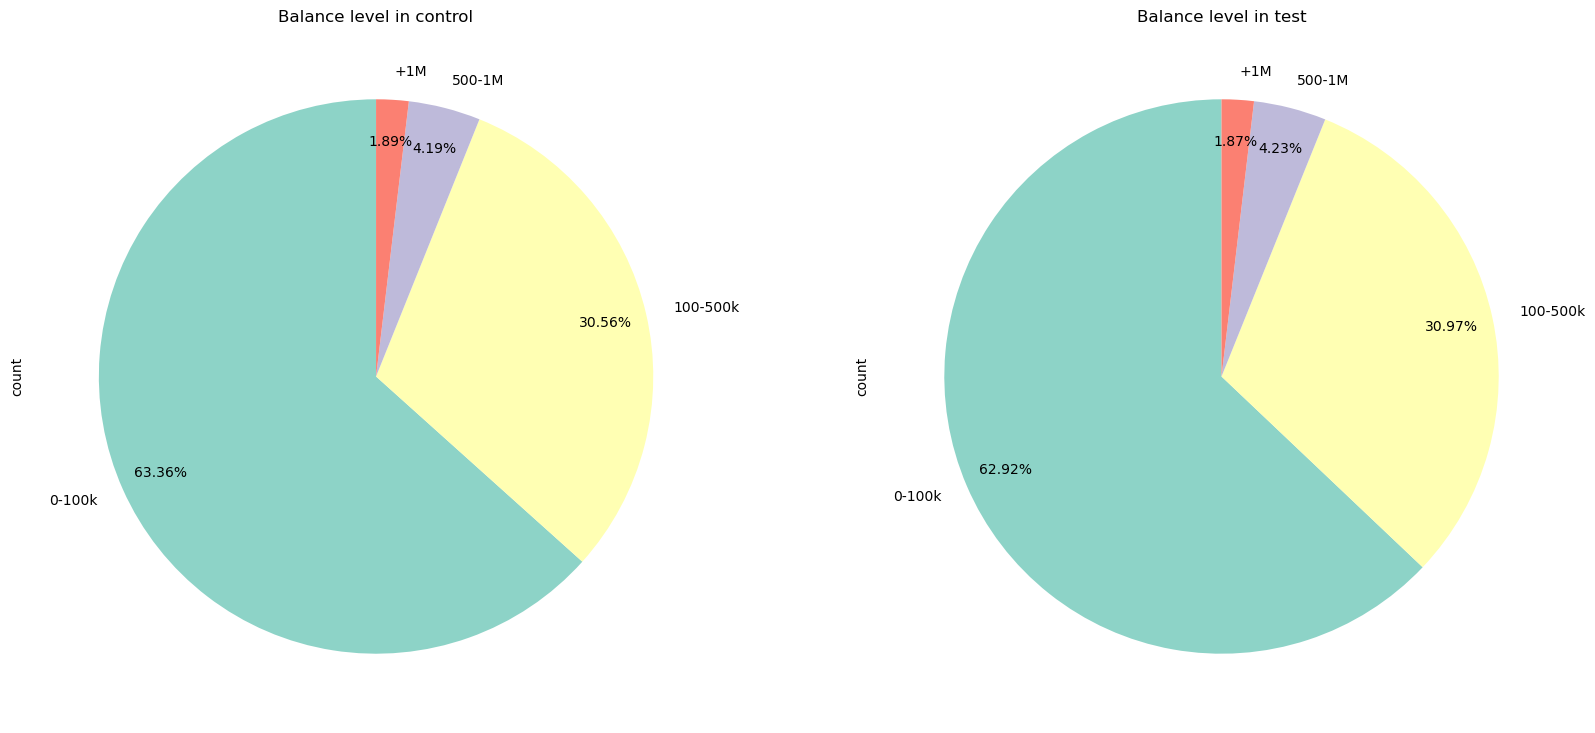

In [59]:
plt.figure(figsize=(20,9))
plt.subplot(1,2,1)
frequency_table_balance_level_control.plot.pie(autopct='%1.2f%%', startangle=90, colors=sns.color_palette("Set3"), pctdistance=0.85, labeldistance=1.1  )

plt.title('Balance level in control')
plt.subplot(1,2,2)
frequency_table_balance_level_test.plot.pie(autopct='%1.2f%%', startangle=90, colors=sns.color_palette("Set3"), pctdistance=0.85, labeldistance=1.1 )
plt.title('Balance level in test')
plt.show()

In [60]:
clientes_control = df_control['client_id'].tolist()
clientes_test = df_test['client_id'].tolist()

both_experiments = []

for i in clientes_control:
    if i in clientes_test: 
        both_experiments.append(i)

In [61]:
both_experiments

[]

In [62]:
df_control.columns

Index(['client_id', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth', 'generation',
       'testing_engagement', 'balance_level', 'tenure', 'Variation',
       'visitor_id', 'visit_id', 'process_step', 'date_time'],
      dtype='object')

In [67]:
df_pasos_1 = df_control.groupby(['client_id', 'visit_id', 'process_step'], as_index= False).agg({'date_time':['min', 'max']})
df_pasos_1

client_id                      visit_id process_step  \
                                                              
0           1028  557292053_87239438319_391157        start   
1           1028  557292053_87239438319_391157       step_1   
2           1028  557292053_87239438319_391157       step_2   
3           1028  557292053_87239438319_391157       step_3   
4           1104  543158812_46395476577_767725        start   
...          ...                           ...          ...   
109132   9998346  189177304_69869411700_783154        start   
109133   9998346  189177304_69869411700_783154       step_1   
109134   9998346  189177304_69869411700_783154       step_2   
109135   9998346  189177304_69869411700_783154       step_3   
109136   9998921    378424178_59565976155_8051        start   

                  date_time                       
                        min                  max  
0       2017-04-08 18:51:28  2017-04-08 18:51:28  
1       2017-04-08 18:52:17  2017-04-08 19:00:26  
2       2017-04-08 18:53:29  2017-04-08 19:00:17  
3       2017-04-08 18:58:04  2017-04-08 18:58:04  
4       2017-06-12 07:49:18  2017-06-12 07:49:18  
...                     ...                  ...  
109132  2017-03-29 15:25:00  2017-03-29 15:25:00  
109133  2017-03-29 15:26:02  2017-03-29 15:29:55  
109134  2017-03-29 15:26:47  2017-03-29 15:30:11  
109135  2017-03-29 15:28:00  2017-03-29 15:37:28  
109136  2017-04-18 11:26:31  2017-04-18 11:26:31  

[109137 rows x 5 columns]

In [68]:
df_control

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,generation,testing_engagement,balance_level,tenure,Variation,visitor_id,visit_id,process_step,date_time
11,2304905,7.0,94.0,58.0,U,2,110860.30,6.0,9.0,boomers,low,100-500k,5-10,Control,336210275_56978226960,724930510_65323235593_692754,confirm,2017-05-21 11:07:16
12,2304905,7.0,94.0,58.0,U,2,110860.30,6.0,9.0,boomers,low,100-500k,5-10,Control,336210275_56978226960,724930510_65323235593_692754,step_3,2017-05-21 11:04:53
13,2304905,7.0,94.0,58.0,U,2,110860.30,6.0,9.0,boomers,low,100-500k,5-10,Control,336210275_56978226960,724930510_65323235593_692754,step_2,2017-05-21 11:04:04
14,2304905,7.0,94.0,58.0,U,2,110860.30,6.0,9.0,boomers,low,100-500k,5-10,Control,336210275_56978226960,724930510_65323235593_692754,step_1,2017-05-21 11:03:31
15,2304905,7.0,94.0,58.0,U,2,110860.30,6.0,9.0,boomers,low,100-500k,5-10,Control,336210275_56978226960,724930510_65323235593_692754,start,2017-05-21 11:03:25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317097,6967120,21.0,260.0,68.5,M,3,4279873.38,6.0,9.0,boomers,low,+1M,20-50,Control,663474827_38847225720,923772865_74694577233_449836,confirm,2017-04-12 19:06:55
317098,6967120,21.0,260.0,68.5,M,3,4279873.38,6.0,9.0,boomers,low,+1M,20-50,Control,663474827_38847225720,923772865_74694577233_449836,step_3,2017-04-12 19:05:14
317099,6967120,21.0,260.0,68.5,M,3,4279873.38,6.0,9.0,boomers,low,+1M,20-50,Control,663474827_38847225720,923772865_74694577233_449836,step_2,2017-04-12 19:04:29
317100,6967120,21.0,260.0,68.5,M,3,4279873.38,6.0,9.0,boomers,low,+1M,20-50,Control,663474827_38847225720,923772865_74694577233_449836,step_1,2017-04-12 19:04:07


In [69]:
def time_custom(group):
    if group.name == 'start':
        return group.min()
    else:
        return group.max()
    
    

In [71]:
df_control[['visit_id', 'process_step', 'date_time']].sort_values(by = ['visit_id', 'process_step']).head(15)

,visit_id,process_step,date_time
148115,100030127_47967100085_936361,start,2017-03-22 11:07:49
226760,100037962_47432393712_705583,start,2017-04-14 16:44:03
226762,100037962_47432393712_705583,start,2017-04-14 16:43:16
226763,100037962_47432393712_705583,start,2017-04-14 16:41:51
226761,100037962_47432393712_705583,step_1,2017-04-14 16:43:55
136962,100057941_88477660212_944512,start,2017-04-09 11:30:10
136958,100057941_88477660212_944512,step_1,2017-04-09 11:33:21
136961,100057941_88477660212_944512,step_1,2017-04-09 11:30:40
136957,100057941_88477660212_944512,step_2,2017-04-09 11:33:58
136960,100057941_88477660212_944512,step_2,2017-04-09 11:31:50


In [73]:
df_control_pasos = df_control.groupby(
    ['client_id', 'visit_id', 'process_step'], as_index=False
).agg({'date_time': time_custom})
df_control_pasos

,client_id,visit_id,process_step,date_time
0,1028,557292053_87239438319_391157,start,2017-04-08 18:51:28
1,1028,557292053_87239438319_391157,step_1,2017-04-08 19:00:26
2,1028,557292053_87239438319_391157,step_2,2017-04-08 19:00:17
3,1028,557292053_87239438319_391157,step_3,2017-04-08 18:58:04
4,1104,543158812_46395476577_767725,start,2017-06-12 07:49:18
...,...,...,...,...
109132,9998346,189177304_69869411700_783154,start,2017-03-29 15:25:00
109133,9998346,189177304_69869411700_783154,step_1,2017-03-29 15:29:55
109134,9998346,189177304_69869411700_783154,step_2,2017-03-29 15:30:11
109135,9998346,189177304_69869411700_783154,step_3,2017-03-29 15:37:28


In [84]:
#df_control_pasos = df_control_pasos.sort_values(by=['client_id', 'visit_id','process_step','date_time'])

#df_control_pasos['time_diff'] = df_control_pasos.groupby(['client_id', 'visit_id'])['date_time'].diff()
#df_control_pasos = df_control_pasos.sort_values(by=['client_id', 'visit_id', 'date_time', 'process_step'])
#df_control_pasos

#df_control_pasos = df_control_pasos.sort_values(by=['client_id', 'visit_id', 'process_step', 'date_time'])
# Asegúrate de que 'date_time' está en formato datetime
df_control_pasos['date_time'] = pd.to_datetime(df_control_pasos['date_time'])

# Ordenar los datos
df_control_pasos = df_control_pasos.sort_values(by=['client_id', 'visit_id', 'process_step', 'date_time'])

# Calcular la diferencia de tiempo
df_control_pasos['time_diff'] = df_control_pasos.groupby(['client_id', 'visit_id'])['date_time'].diff()

# Si deseas eliminar filas con 'NaT' en 'time_diff'
df_control_pasos = df_control_pasos.dropna(subset=['time_diff'])

# Ver los resultados
df_control_pasos

,client_id,visit_id,process_step,date_time,time_diff
2,1028,557292053_87239438319_391157,step_2,2017-04-08 19:00:17,-1 days +23:59:51
3,1028,557292053_87239438319_391157,step_3,2017-04-08 18:58:04,-1 days +23:57:47
9,1186,795373564_99931517312_810896,step_2,2017-04-08 18:05:24,0 days 00:00:11
12,1195,393817425_39015278493_996341,step_1,2017-04-05 20:15:59,0 days 00:00:33
13,1195,393817425_39015278493_996341,step_2,2017-04-05 20:17:37,0 days 00:01:38
...,...,...,...,...,...
109128,9997470,761490147_96352537762_21814,step_2,2017-05-09 16:38:37,0 days 00:00:03
109129,9997470,761490147_96352537762_21814,step_3,2017-05-09 16:39:16,0 days 00:00:39
109133,9998346,189177304_69869411700_783154,step_1,2017-03-29 15:29:55,0 days 00:04:55
109134,9998346,189177304_69869411700_783154,step_2,2017-03-29 15:30:11,0 days 00:00:16


In [ ]:
# Ordenar los datos por 'client_id' y 'step'
#busqueda_sorted_max_min_hours = busqueda_sorted_max_min_hours.sort_values(by=['visit_id', 'process_step'])

# Crear una nueva columna con la diferencia entre el 'max' de un paso y el 'min' del siguiente paso
#busqueda_sorted_max_min_hours['time_to_next_step'] = busqueda_sorted_max_min_hours.groupby('visit_id')['in_step'].shift(-1) - busqueda_sorted_max_min_hours['out_step']

# Ver el resultado
#busqueda_sorted_max_min_hours

# Agrupamos por 'client_id', 'visit_id' y 'process_step'
#busqueda_sorted_max_min_hours = busqueda_sorted.groupby(['client_id', 'visit_id', 'process_step']).agg(in_step=('time', 'min'), out_step=('time', 'max')).reset_index()

# Calcular el tiempo de espera como la diferencia entre la hora final e inicial
#busqueda_sorted_max_min_hours['time_each_step'] = busqueda_sorted_max_min_hours['out_step'] - busqueda_sorted_max_min_hours['in_step']

# Mostrar los resultados
#busqueda_sorted_max_min_hours

In [79]:
#Test completion rate for test group
df_test = df[df["Variation"] == "Test"]
df_test[df_test["process_step"] == "confirm"]

df_test_confirm = df_test[df_test["process_step"] == "confirm"].groupby("client_id").agg({"process_step":"count"})
round(df_test_confirm.shape[0]/df_test.groupby("client_id").agg({"process_step":"count"}).shape[0]*100, 2)

69.29

In [80]:
# Test completion rate for test group
df_test = df[df["Variation"] == "Test"]
df_test[df_test["process_step"] == "confirm"]
df_test['repetition'] = df_test.duplicated(subset=["visit_id", "process_step"], keep="last")
df_test
df_test_no_repetition = df_test[df_test['repetition'] == False]
df_test_no_repetition
df_test_confirm = df_test_no_repetition[df_test_no_repetition["process_step"] == "confirm"].groupby("client_id").agg({"process_step":"count"})
round(df_test_confirm.shape[0]/df_test.groupby("client_id").agg({"process_step":"count"}).shape[0]*100, 2)

C:\Users\celia\AppData\Local\Temp\ipykernel_11188\675165737.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['repetition'] = df_test.duplicated(subset=["visit_id", "process_step"], keep="last")


69.1

In [81]:
# Test completion rate for test group
df_control = df[df["Variation"] == "Control"]
df_control[df_control["process_step"] == "confirm"]
df_control['repetition'] = df_control.duplicated(subset=["visit_id", "process_step"], keep="last")
df_control
df_control_no_repetition = df_control[df_control['repetition'] == False]
df_control_no_repetition
df_control_confirm = df_control_no_repetition[df_control_no_repetition["process_step"] == "confirm"].groupby("client_id").agg({"process_step":"count"})
round(df_control_confirm.shape[0]/df_control.groupby("client_id").agg({"process_step":"count"}).shape[0]*100, 2)

C:\Users\celia\AppData\Local\Temp\ipykernel_11188\24486171.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_control['repetition'] = df_control.duplicated(subset=["visit_id", "process_step"], keep="last")


65.4

In [82]:
# Test completion rate for control group
df_control = df[df["Variation"] == "Control"]
df_control[df_control["process_step"] == "confirm"]

df_control_confirm = df_control[df_control["process_step"] == "confirm"].groupby("client_id").agg({"process_step":"count"})
round(df_control_confirm.shape[0]/df_control.groupby("client_id").agg({"process_step":"count"}).shape[0]*100, 2)

65.58